<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Install-and-load-necessary-libraries" data-toc-modified-id="Install-and-load-necessary-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Install and load necessary libraries</a></span></li></ul></li><li><span><a href="#Create-our-AHP-Tree" data-toc-modified-id="Create-our-AHP-Tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create our AHP Tree</a></span></li><li><span><a href="#Some-basic-analysis" data-toc-modified-id="Some-basic-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Some basic analysis</a></span></li></ul></div>

# Introduction

This [Jupyter](https://jupyter.org) notebook performs the analysis of Dr. Bill Adams' and Dr. Jay Stryker consumer choice AHP model for cell phones (see [github.com/wjladams/consumerAHP](https://github.com/wjladams/consumerAHP))

## Install and load necessary libraries

In [1]:
%pip install pyanp

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyanp import ahptree
import numpy as np
import pandas as pd
import re
from copy import deepcopy
from helpers import *
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (12,7)

# Create our AHP Tree

In [5]:
from io import BytesIO

import requests
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1jxuBHUYA8Jy5iSRx2PZ7lNg0Ag2gf-cC63LoCCru-j4&output=csv')
data = r.content
df = pd.read_csv(BytesIO(data))
df.tail()

,Timestamp,Considering: Cost versus Style,Considering: Functionality versus Style,Considering: Cost versus Functionality,Considering: Photography versus Gaming,Considering: Gaming versus Storage,Considering: Photography versus Storage,Name,Age,Location,...,iPhone X wrt Style,Galaxy S8 wrt Photography,Galaxy S10 wrt Photography,iPhone X wrt Photography,Galaxy S8 wrt Gaming,Galaxy S10 wrt Gaming,iPhone X wrt Gaming,Galaxy S8 wrt Storage,Galaxy S10 wrt Storage,iPhone X wrt Storage
0,3/14/2020 22:41:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.2,0.5,1.0,0.5,1.0,0.75,0.5,1.0,0.85
1,3/14/2020 22:41:31,Cost is much more important,Functionality is much more important,Cost is more important,Photography is much more important,Storage is much more important,Photography is more important,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/15/2020 10:42:58,Style is much more important,Style is more important,Functionality is more important,Photography is much more important,They are basically equal,Photography is much more important,NaN,Under 20,Central America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/15/2020 10:44:01,They are basically equal,They are basically equal,They are basically equal,They are basically equal,They are basically equal,They are basically equal,NaN,60+,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We need to rename some columns for compatibility with pyanp
* also need to convert the votes

In [6]:
df.rename(columns = {
    'Considering: Cost versus Style' : 'Cost vs Style',
    'Considering: Functionality versus Style' : 'Functionality vs Style',
    'Considering: Cost versus Functionality' : 'Cost vs Functionality',
    'Considering: Photography versus Gaming' : 'Photography vs Gaming wrt Functionality',
    'Considering: Gaming versus Storage' : 'Gaming vs Storage wrt Functionality',
    'Considering: Photography versus Storage' : 'Photography vs Storage wrt Functionality'
}, inplace=True)
for col in df.columns:
    if re.search(r'\s+vs\s+',col):
        df[col] = betterScaleDataToNumeric(col, df[col])
df

,Timestamp,Cost vs Style,Functionality vs Style,Cost vs Functionality,Photography vs Gaming wrt Functionality,Gaming vs Storage wrt Functionality,Photography vs Storage wrt Functionality,Name,Age,Location,...,iPhone X wrt Style,Galaxy S8 wrt Photography,Galaxy S10 wrt Photography,iPhone X wrt Photography,Galaxy S8 wrt Gaming,Galaxy S10 wrt Gaming,iPhone X wrt Gaming,Galaxy S8 wrt Storage,Galaxy S10 wrt Storage,iPhone X wrt Storage
0,3/14/2020 22:41:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.2,0.5,1.0,0.5,1.0,0.75,0.5,1.0,0.85
1,3/14/2020 22:41:31,5,5,2,5,0.2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/15/2020 10:42:58,0.2,0.5,0.5,5,1,5,NaN,Under 20,Central America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/15/2020 10:44:01,1,1,1,1,1,1,NaN,60+,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ahp = ahptree.ahptree_fromdf(df)
ahp

# Some basic analysis

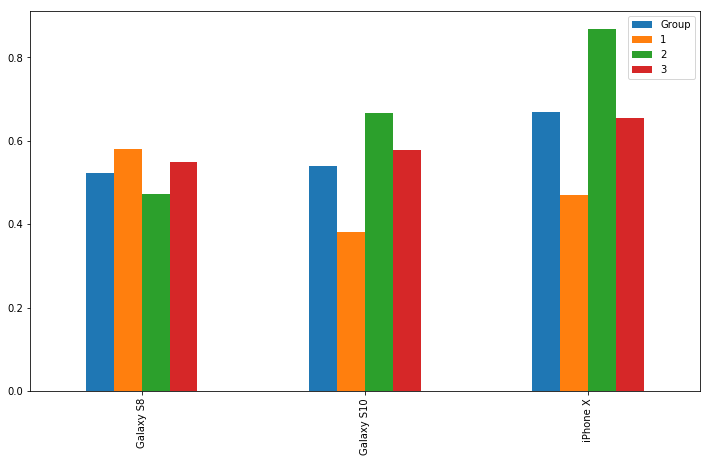

In [8]:
altscores = ahp.priority_table()
altscores.plot(kind="bar")